# Importing Data and Packages

In [ ]:
from google.colab import files
uploaded = files.upload()
! unzip train_targets_scored.csv.zip
! unzip train_features.csv.zip

Saving train_features.csv.zip to train_features.csv.zip
Saving train_targets_scored.csv.zip to train_targets_scored.csv.zip
Archive:  train_targets_scored.csv.zip
  inflating: train_targets_scored.csv  
Archive:  train_features.csv.zip
  inflating: train_features.csv      


In [ ]:
from google.colab import files
uploaded = files.upload()
! unzip test_features.csv.zip

Saving test_features.csv.zip to test_features.csv.zip
Archive:  test_features.csv.zip
  inflating: test_features.csv       


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train = pd.read_csv('train_features.csv')
# X_test = pd.read_csv('test_features.csv')

In [ ]:
y_train = pd.read_csv('train_targets_scored.csv').drop(columns=['sig_id'])

In [ ]:
def encode_dummies(df):
  df['treatment'] = 1*(df.cp_type == 'trt_cp')
  df['D1'] = 1*(df.cp_dose == 'D1')
  df['cp_time'] = df.cp_time/24
  return df.drop(columns = ['sig_id', 'cp_type', 'cp_dose'])

In [ ]:
X_train = encode_dummies(X_train)
# X_test = encode_dummies(X_test)

In [ ]:
gene_list = ['g-'+str(i) for i in range(772)]
gene_exp = X_train[gene_list].values
# gene_exp_s = gene_exp.T
cell_list = ['c-'+str(i) for i in range(100)]
cell_via = X_train[cell_list].values

# Feature Dimension Reduction

## K-Means Clustering/Kernel PCA

In [ ]:
#Gene expressions
num_cluster = 10
kmeans = KMeans(n_clusters=num_cluster)
kmeans.fit(gene_exp_s)
knn10 = kmeans.cluster_centers_.T
columns = ['cluster'+str(i) for i in range(1, 11)]
g_cluster_df = pd.DataFrame(knn10, columns=columns)

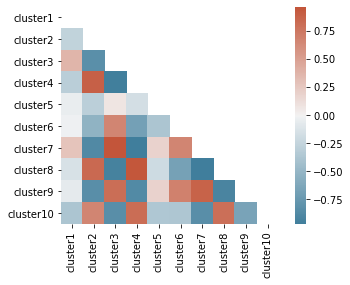

In [ ]:
#Cluster correlation
g_corr = g_cluster_df.corr()
mask = np.triu(np.ones_like(g_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(g_corr,mask=mask, cmap=cmap, square=True)

In [ ]:
# Compute errors clustering
errors = []
ks = list(range(1,20,2))
ks.extend([30,40, 50])
for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(gene_exp_s)
  errors.append(kmeans.inertia_)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


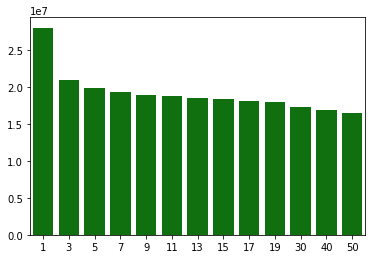

In [ ]:
# Accuracy of clustering / # of clusters
sns.barplot(ks, errors, color = 'g')

In [ ]:
# Histogram of each cluster
for i in range(len(knn10.T)):
  plt.figure()
  sns.histplot(knn10.T[i,:])

## PCA

### Gene expression

In [ ]:
# First two principal component with five most frequent MoA
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100)
gene_pca = pca.fit_transform(gene_exp)
num_features = list(range(pca.n_components_))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variance explained by principal components - Gene')

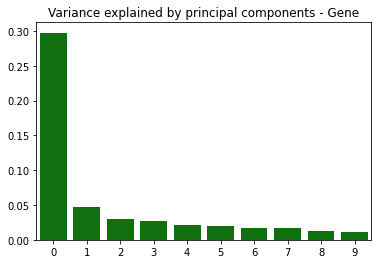

In [ ]:
plt.figure()
sns.barplot(num_features[:10], pca.explained_variance_ratio_[:10], color='g') 
plt.title("Variance explained by principal components - Gene")

In [ ]:
print("Gene feature variance explained by first 10 features: ")
np.cumsum(pca.explained_variance_ratio_)

Gene feature variance explained by first 10 features: 


array([0.29734508, 0.34410798, 0.3745819 , 0.40162744, 0.42326748,
       0.44320877, 0.46072195, 0.47737419, 0.48957602, 0.50039008,
       0.51033589, 0.51953365, 0.52730413, 0.53490378, 0.54224014,
       0.54930426, 0.5556887 , 0.56180496, 0.56751931, 0.57271803,
       0.57760572, 0.58201957, 0.58627175, 0.59023967, 0.59400911,
       0.59756772, 0.60103381, 0.6043896 , 0.60758796, 0.61055268,
       0.61344448, 0.61632707, 0.61917555, 0.62190214, 0.62454439,
       0.62712589, 0.62964407, 0.63202482, 0.6343794 , 0.63665545,
       0.63888125, 0.64103749, 0.64315286, 0.6452375 , 0.64730763,
       0.64932988, 0.65133263, 0.65324181, 0.65513226, 0.65697909,
       0.65879579, 0.66059988, 0.66233386, 0.66403911, 0.66570992,
       0.66736825, 0.66901804, 0.67065242, 0.67228037, 0.6738784 ,
       0.67546128, 0.67699347, 0.67850349, 0.68000935, 0.68150051,
       0.68298185, 0.68443967, 0.68588809, 0.68730409, 0.68870118,
       0.69009364, 0.69147427, 0.69284074, 0.6941968 , 0.69555

In [ ]:
# for i in range(5):
#   plt.figure()
#   plt.scatter(gene_pca[target5[:,i]==1, 0], gene_pca[target5[:,i]==1, 1], c="blue",
#               s=20, edgecolor='k')
#   plt.scatter(gene_pca[target5[:,i]==0, 0], gene_pca[target5[:,i]==0, 1], c="yellow",
#               s=20, edgecolor='k')

### Cell Viability

In [ ]:
pca_cell = PCA(n_components=100)
cell_pca_trans = pca_cell.fit_transform(cell_via)
num_features = list(range(pca_cell.n_components_))

In [ ]:
cell_pca = cell_pca_trans[:,:20]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variance explained by principal components - Cell')

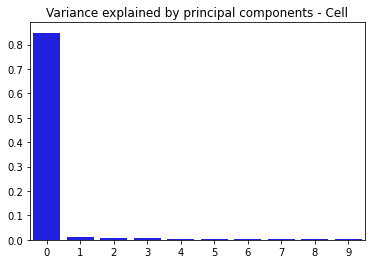

In [ ]:
# plt.figure()
# sns.barplot(num_features[:10], pca_cell.explained_variance_ratio_[:10], color='b')
# plt.title("Variance explained by principal components - Cell")

In [ ]:
# print("cell feature variance explained by first 5 principal components")
np.cumsum(pca_cell.explained_variance_ratio_[:20])

array([0.84853809, 0.85991709, 0.86788447, 0.87353525, 0.87798324,
       0.88176423, 0.88541928, 0.88873555, 0.89181586, 0.8947629 ,
       0.89733703, 0.89961654, 0.9017707 , 0.9038773 , 0.90588537,
       0.90780431, 0.90969972, 0.91157918, 0.91339223, 0.91518631])

In [ ]:
# for i in range(1):
#   plt.figure()
#   plt.scatter(cell_pca_trans[target5[:,i]==1, 0], cell_pca_trans[target5[:,i]==1, 1], c="yellow",
#               s=20, edgecolor='k')
#   plt.figure()
#   plt.scatter(cell_pca_trans[target5[:,i]==0, 0], cell_pca_trans[target5[:,i]==0, 1], c="blue",
#               s=20, edgecolor='k')

# Models

### Data processing - [Run this first]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.utils import resample
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def pca_features(df, var_list, n):
  '''
  df: dataframe
  var_list: variable list to be fitted
  n: number of components

  return: (fitted PCA model, principal components)
  '''
  pca = PCA(n_components=n)
  pca_features = pca.fit_transform(df[var_list])
  return (pca, pca_features)

def df_to_array(df, var_list, gene, cell):
  '''
  return: numpy array with transformed principal components
  '''
  a = df.drop(columns=var_list).values
  a = np.hstack((a, gene, cell))
  return a

In [ ]:
def pca_transform(X_train_2, X_train_val):
  '''
  Run PCA on training data and transform both train and test data according to obtained components
  
  X_train_2: dataframe, training data 
  X_train_val: dataframe, test/validation data

  return: X_train, X_val, y_train, y_val as numpy array
  '''

  # X_train_2, X_train_val, y_train_2, y_train_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=47)

  gene_list = ['g-'+str(i) for i in range(772)]
  cell_list = ['c-'+str(i) for i in range(100)]

  pca_gene, gene_features = pca_features(X_train_2, gene_list, 100)
  pca_cell, cell_features = pca_features(X_train_2, cell_list, 20)

  X_train_2 = df_to_array(X_train_2, gene_list+cell_list, gene_features, cell_features)
  X_train_val = df_to_array(X_train_val, gene_list+cell_list, pca_gene.transform(X_train_val[gene_list]), pca_cell.transform(X_train_val[cell_list]))

  # y_train_2 = y_train_2.values
  # y_train_val = y_train_val.values

  return X_train_2, X_train_val

## I. Random Forests - multilabel

### Training

In [ ]:
X_train_2, X_train_val, y_train_2, y_train_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=47)
X_train_2, X_val = pca_transform(X_train_2, X_train_val)
y_train_2 = y_train_2.values
y_train_val = y_train_val.values

In [ ]:
rf = RandomForestClassifier(n_estimators=250, max_depth=30, random_state=47)
rf.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [ ]:
y_train_pred = rf.predict_proba(X_train_2)
train_loss = []
for i in range(len(y_train_pred)):
  train_loss.append(log_loss(y_train_2[:,i], y_train_pred[i], labels=[0,1]))
print("training loss: ", np.mean(train_loss))

training loss:  0.01220559090802985


In [ ]:
y_val_pred = rf.predict_proba(X_val)
val_loss = []
for i in range(len(y_val_pred)):
  val_loss.append(log_loss(y_train_val[:,i], y_val_pred[i], labels=[0,1]))
print("validation loss: ", np.mean(val_loss))

validation loss:  0.016499928562774345


In [ ]:
train_pred = rf.predict(X_train_2)

[0.5467142557211842, 0.5465043040100777]

In [ ]:
from sklearn.metrics import accuracy_score

print("training error: ",accuracy_score(rf.predict(X_train_val), y_train_val))
print("test error: ",accuracy_score(rf.predict(X_val), y_val))

training error:  0.9982153167812713
test error:  0.46063405416754144


In [ ]:
#save model
from google.colab import drive
drive.mount('/content/drive')

from joblib import dump, load
dump(rf, './drive/My Drive/Kaggle/rf_200_depth40.joblib') 

# rf = load('./drive/My Drive/Kaggle/rf_pca_20.joblib')

['./drive/My Drive/Kaggle/rf_200_depth40.joblib']

## II. Gradient Boosting - oneVsRest

### Upsampling

In [ ]:
def upsample(X, y, i):
  '''
  upsample positive response in the ith column of y matrix to size 1000
  '''
  idx1 = np.where(y[:,i]==1)[0]
  idx0 = np.where(y[:,i]==0)[0]
  up_idx = np.random.choice(idx1, replace = True, size = 1000)
  X_upsampled = np.vstack((X[idx0], X[up_idx.T]))
  y_upsampled = np.vstack(((y[idx0, i:(i+1)], y[up_idx.T, i:(i+1)])))
  
  return X_upsampled, y_upsampled[:,0]

### Training

In [ ]:
X_train_2, X_train_val, y_train_2, y_train_val = train_test_split(X_train, y_train, test_size = 0.2)
X_train_2, X_val = pca_transform(X_train_2, X_train_val)
y_train_2 = y_train_2.values
y_train_val = y_train_val.values
# train_pred_list = np.zeros(y_train_2.shape)
# val_pred_list = np.zeros(y_val.shape)

In [ ]:
X_train_2.shape

(19051, 63)

In [ ]:
# predict each target feature independently
gbc = GradientBoostingClassifier(learning_rate=0.01, max_features=40, n_estimators=180)
train_loss = []
val_loss = []
for i in range(y_val.shape[1]):
  y_train_one = y_train_2[:,i]
  y_val_one = y_val[:,i]

  X_train_upsampled, y_train_upsampled = upsample(X_train_2, y_train_2, i)

  gbc.fit(X_train_upsampled, y_train_upsampled)
  y_train_pred = gbc.predict_proba(X_train_2)
  y_val_pred = gbc.predict_proba(X_val)

  train_loss.append(log_loss(y_train_one, y_train_pred, labels=[0,1]))
  val_loss.append(log_loss(y_val_one, y_val_pred, labels=[0,1]))

  # train_pred_list[:,i] = y_train_pred[:,1].T
  # val_pred_list[:,i] = y_val_pred[:,1].T

In [ ]:
# if predict all labels as 0
y_zeros = np.zeros(y_train_2.shape)
print("maximum loss: ", avg_log_loss(y_zeros, y_train_2))

maximum loss:  0.11865233060063858


In [ ]:
# With 50 gene exp features, 10 cell via features, 180 estimators, max_features 40
print("training loss: ", np.mean(np.array(train_loss)))
print("val loss: ", np.mean(np.array(val_loss)))
dump(gbc, './drive/My Drive/Kaggle/bgt_pca_50_n180.joblib') 

training loss:  0.03714339238685305
val loss:  0.040111082998928405


['./drive/My Drive/Kaggle/bgt_pca_50_n180.joblib']

In [ ]:
# With 50 gene exp features, 10 cell via features, 100 estimators
print("training loss: ", np.mean(np.array(train_loss)))
print("val loss: ", np.mean(np.array(val_loss)))
from joblib import dump, load
dump(gbc, './drive/My Drive/Kaggle/bgt_pca_50_n150.joblib') 

training loss:  0.039929273686301704
val loss:  0.04259601761439843


['./drive/My Drive/Kaggle/bgt_pca_50_n150.joblib']

In [ ]:
# With 50 gene exp features, 10 cell via features, 100 estimators
train_loss = np.mean(np.array(train_loss))
print("training loss: ", np.mean(np.array(train_loss)))
print("val loss: ", np.mean(np.array(val_loss)))
#save model
from joblib import dump, load
dump(gbc, './drive/My Drive/Kaggle/bgt_pca_50.joblib') 

training loss:  0.044857469546382
val loss:  0.04683352716023646


['./drive/My Drive/Kaggle/bgt_pca_50.joblib']

In [ ]:
gbc.set_params(n_estimators = 200)
gbc.fit(X_train_2, y_train_2[:,136])
y1 = gbc.predict_proba(X_train_2)[:,1:].T
avg_log_loss(y1,y_train_2[:,136:137].T)

1.1911173214769064

In [ ]:
np.mean(np.array(train_loss))

0.0324880511971256

In [ ]:
print("training loss: ", avg_log_loss(train_pred_list, y_train_2))
print("validation loss: ", avg_log_loss(val_pred_list, y_val))

training loss:  0.11865233060063858
validation loss:  0.11834689143018978


### Predictions

In [ ]:
X_train_2, X_test_2 = pca_transform(X_train, X_test)
y_train_2 = y_train.values

In [ ]:
X_test_2.shape

(3982, 63)

In [ ]:
#predict probability
gbc = GradientBoostingClassifier(learning_rate=0.01, max_features=40, n_estimators=200)
train_loss = []
y_test_pred = []
for i in range(y_train_2.shape[1]):
  y_train_one = y_train_2[:,i]

  X_train_upsampled, y_train_upsampled = upsample(X_train_2, y_train_2, i)

  gbc.fit(X_train_upsampled, y_train_upsampled)
  y_train_pred = gbc.predict_proba(X_train_2)
  y_pred = gbc.predict_proba(X_test_2)[:,1]

  train_loss.append(log_loss(y_train_one, y_train_pred, labels=[0,1]))
  y_test_pred.append(y_pred)


In [ ]:
y_pred = np.array(y_test_pred)
y_pred = y_pred.T

In [ ]:
#convert to dataframe
col = y_train.columns
y_pred_df = pd.DataFrame(y_pred, columns = col)
sig_id = pd.read_csv('test_features.csv')[['sig_id']]
y_pred_df = sig_id.join(y_pred_df)
#append sig_id column from X_test

In [ ]:
y_pred_df.to_csv('moa_predictions.csv')
!cp moa_predictions.csv "./drive/My Drive/Kaggle/"

## III. Neural Network

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F 
import torch.utils.data as data

In [ ]:
X_train_2, X_train_val, y_train_2, y_train_val = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
X_train_nn = torch.from_numpy(X_train_2.to_numpy()) 
X_val_nn = torch.from_numpy(X_train_val.to_numpy())
y_train_nn = torch.from_numpy(y_train_2.to_numpy())
y_val_nn = torch.from_numpy(y_train_val.to_numpy())

In [ ]:
train_data = data.TensorDataset(X_train_nn, y_train_nn)
trainloader = data.DataLoader(train_data, batch_size = 256, shuffle=True)

val_data = data.TensorDataset(X_val_nn, y_val_nn)

In [ ]:
class Net(nn.Module):
  
  def __init__(self, n_features, drop_rate):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(n_features, 200)
    self.linear2 = nn.Linear(200, 180)
    self.linear3 = nn.Linear(180, 150)
    self.linear4 = nn.Linear(150, 200)
    self.linear5 = nn.Linear(200, 206)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.dropout(x, p=drop_rate)
    x = F.relu(self.linear2(x))
    x = F.dropout(x, p=drop_rate)
    x = F.relu(self.linear3(x))
    x = F.dropout(x, p=drop_rate)
    x = F.relu(self.linear4(x))
    x = F.dropout(x, p=drop_rate)
    x = self.linear5(x)
    
    return torch.sigmoid(x)

In [ ]:
drop_rate = 0.18
net = Net(X_train_2.shape[1], drop_rate)

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0008, weight_decay=1e-5)

In [ ]:
training_loss = []
validation_loss = []

for epoch in range(15):

  train_loss = []

  for batch in trainloader:

    optimizer.zero_grad()

    y_pred = net(batch[0].float())
    loss = criterion(y_pred, batch[1].float())
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  net.eval()
  print("Epoch", epoch)
  print("training loss: ", np.mean(train_loss))
  training_loss.append(np.mean(train_loss))
  y_val_pred = net(X_val_nn.float())
  val_loss = criterion(y_val_pred, y_val_nn.float())
  print("validation loss: ", val_loss.item())
  validation_loss.append(val_loss.item())

  # print("training accuracy: ", accuracy_score(y_pred, y_train))
  # print("validation accuracy: ", accuracy_score(y_val_pred, y_val))

Epoch 0
training loss:  0.13582685075345494
validation loss:  0.025587840005755424
Epoch 1
training loss:  0.022565548463414114
validation loss:  0.02269960753619671
Epoch 2
training loss:  0.020997207212660993
validation loss:  0.02169211208820343
Epoch 3
training loss:  0.019950788734214648
validation loss:  0.02076396532356739
Epoch 4
training loss:  0.019196691767623026
validation loss:  0.020118527114391327
Epoch 5
training loss:  0.018486340131078447
validation loss:  0.019556762650609016
Epoch 6
training loss:  0.017892313034584124
validation loss:  0.01899341307580471
Epoch 7
training loss:  0.017185219530282275
validation loss:  0.018631942570209503
Epoch 8
training loss:  0.016737801555011953
validation loss:  0.018441693857312202
Epoch 9
training loss:  0.01635598086397208
validation loss:  0.018254846334457397
Epoch 10
training loss:  0.01609796969707878
validation loss:  0.018227068707346916
Epoch 11
training loss:  0.01582391085546641
validation loss:  0.01812771148979664

In [ ]:
y_pred = y_val_pred.detach().numpy().shape

col = y_train.columns
y_pred_df = pd.DataFrame(y_pred, columns = col)
sig_id = pd.read_csv('test_features.csv')[['sig_id']]
y_pred_df = sig_id.join(y_pred_df)

(2382, 206)